In [1]:
import cv2
import matplotlib.pyplot as plt

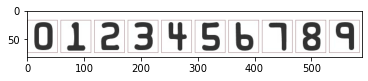

In [2]:
cc = cv2.imread(r'creditcard_digits1.jpg')
plt.imshow(cc)

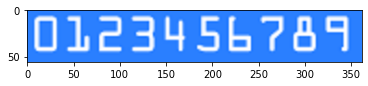

In [3]:
cc2 = cv2.imread(r'creditcard_digits2.jpg')
plt.imshow(cc2)

In [5]:
import os
import numpy as np
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D,ZeroPadding2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [6]:
input_shape = (32,32,3)
image_w = 32
image_h = 32
n_classes = 10
n_train_sample = 10000
n_validation_sample = 2000
batch_size = 16
epochs = 1

train_data = r'credit_card_original\train\\' 
test_data = r'credit_card_original\test\\'

test_data_generator = ImageDataGenerator(rescale = 1./255)

train_data_generator = ImageDataGenerator(rescale = 1./255,rotation_range=10,width_shift_range=0.2,height_shift_range=0.25,shear_range=0.2,zoom_range=0.5,horizontal_flip=False,fill_mode='nearest')

train_generator = train_data_generator.flow_from_directory(train_data,target_size = (image_w,image_h),batch_size = batch_size,class_mode = 'categorical')

test_generator = test_data_generator.flow_from_directory(test_data,target_size = (image_w,image_h),batch_size = batch_size,class_mode = 'categorical',shuffle = False)

Found 20000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


In [7]:
## LeNET architecture
model = Sequential()

model.add(Conv2D(20,(5,5),padding = 'same',input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides = (2,2)))

model.add(Conv2D(50,(5,5),padding = 'same',input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides = (2,2)))

model.add(Flatten())
model.add(Dense(500))
model.add(Activation('relu'))

model.add(Dense(n_classes))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer = optimizers.Adadelta(),metric = ['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 20)        1520      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 20)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 50)        25050     
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0

In [8]:
## Training the model
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.optimizers import RMSprop

check = ModelCheckpoint(r'../cc.h5',monitor = 'val_loss',mode = 'min',save_best_only = True,verbose = 1)

early_stop = EarlyStopping(monitor = 'val_loss',patience = 3,restore_best_weights = True)

call_backs = [check,early_stop]

model.compile(loss = 'categorical_crossentropy',optimizer = RMSprop(lr = 0.001),metrics = ['accuracy'])

n_train_sample = 20000
n_test = 4000
epochs = 5
batch_size = 16

h = model.fit_generator(train_generator,steps_per_epoch = n_train_sample,epochs = epochs,callbacks = call_backs,validation_data = test_generator,validation_steps = n_test)

model.save(r'../cc.h5')

Epoch 1/5
19999/20000 [============================>.] - ETA: 0s - loss: 0.1085 - accuracy: 0.9691
Epoch 00001: val_loss improved from inf to 0.01789, saving model to ../cc.h5
20000/20000 [==============================] - 3374s 169ms/step - loss: 0.1085 - accuracy: 0.9691 - val_loss: 0.0179 - val_accuracy: 0.9983
Epoch 2/5
19999/20000 [============================>.] - ETA: 0s - loss: 0.1172 - accuracy: 0.9784
Epoch 00002: val_loss improved from 0.01789 to 0.00993, saving model to ../cc.h5
20000/20000 [==============================] - 3114s 156ms/step - loss: 0.1172 - accuracy: 0.9784 - val_loss: 0.0099 - val_accuracy: 0.9992
Epoch 3/5
19999/20000 [============================>.] - ETA: 0s - loss: 0.1322 - accuracy: 0.9807
Epoch 00003: val_loss improved from 0.00993 to 0.00807, saving model to ../cc.h5
20000/20000 [==============================] - 3144s 157ms/step - loss: 0.1322 - accuracy: 0.9807 - val_loss: 0.0081 - val_accuracy: 0.9995
Epoch 4/5
19999/20000 [=====================